In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import models,layers

from wordcloud import WordCloud, STOPWORDS

import os
count = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if count > 4 :
            break
        count += 1

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

/kaggle/input/globe6bzip/glove.6B.200d.txt
/kaggle/input/globe6bzip/glove.6B.300d.txt
/kaggle/input/globe6bzip/glove.6B.100d.txt
/kaggle/input/globe6bzip/glove.6B.50d.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/imdbEr.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/imdb.vocab
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/test/urls_pos.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/test/pos/9033_10.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/test/neg/4599_4.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/train/unsupBow.feat
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/train/pos/3453_7.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/train/unsup/22940_0.txt
/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb/train/neg/3923_2.txt


In [2]:
imdb_dir = '/kaggle/input/imdb-movie-reviews-dataset/aclimdb/aclImdb'
train_dir = os.path.join(imdb_dir,'train')
test_dir = os.path.join(imdb_dir,'test')
labels = []
texts = []

test_labels = []
test_texts = []

In [3]:
for label_type in ['pos','neg']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [4]:
for label_type in ['pos','neg']:
    dir_name = os.path.join(test_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname))
            test_texts.append(f.read())
            f.close()
            if label_type == 'neg':
                test_labels.append(0)
            else:
                test_labels.append(1)

In [5]:
print(f'Length of texts is {len(texts)}')
print(f'Length of labels id {len(labels)}')
print(f'Length of test_texts is {len(test_texts)}')
print(f'Length of test_labels is {len(test_labels )}')

Length of texts is 25000
Length of labels id 25000
Length of test_texts is 25000
Length of test_labels is 25000


In [6]:
texts_df = pd.DataFrame({'texts': texts,
                        'labels':labels})

In [7]:
texts_df.head()

,texts,labels
0,Though this movie has a first rate roster of f...,1
1,I happened to catch this movie on cable one af...,1
2,"The memory of the ""The Last Hunt"" has stuck wi...",1
3,I just got this video used and I was watching ...,1
4,"<br /><br />""Burning Paradise"" is a combinatio...",1


In [8]:
positive = texts_df[texts_df['labels']==1]['texts']
negative = texts_df[texts_df['labels']==0]['texts']

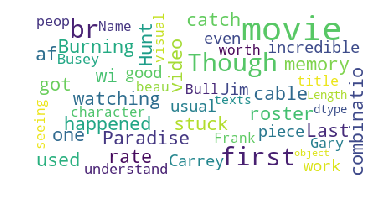

In [9]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(positive))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

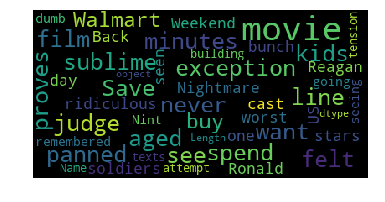

In [10]:
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(negative))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [11]:
MAX_LENGTH = 500
MAX_WORDS = 20000
EMBENDING_DIM = 100

In [12]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [13]:
word_index = tokenizer.word_index

In [14]:
print(f'Found {len(word_index)} unique tokens.' )

Found 88582 unique tokens.


In [15]:
data = pad_sequences(sequences,maxlen=MAX_LENGTH)
labels = np.array(labels)

In [16]:
print(f'Shape of Data tensor is {data.shape}')
print(f'Shape of Labels tensor is {labels.shape}')

Shape of Data tensor is (25000, 500)
Shape of Labels tensor is (25000,)


In [17]:
X_train, X_val, y_train, y_val = train_test_split(data,labels,test_size=0.2,random_state=42)

In [18]:
glove_dir = "/kaggle/input/globe6bzip/glove.6B.100d.txt"

embedding_index = {}
f = open(glove_dir)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

print(f'Found {len(embedding_index)} word vectors')

Found 400000 word vectors


In [19]:
embedding_index['go'][:10]

array([-0.078894,  0.4616  ,  0.57779 , -0.71637 , -0.13121 ,  0.4186  ,
       -0.29156 ,  0.52006 ,  0.089986, -0.35062 ], dtype=float32)

In [20]:
embedding_matrix = np.zeros((MAX_WORDS,EMBENDING_DIM))

In [21]:
for word, i in word_index.items():
    if i < MAX_WORDS:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [22]:
embedding_df = pd.DataFrame(embedding_matrix)

In [23]:
embedding_df.shape

(20000, 100)

In [24]:
model = models.Sequential()
model.add(layers.Embedding(MAX_WORDS,EMBENDING_DIM, input_length=MAX_LENGTH))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,017,057
Trainable params: 2,017,057
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [26]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_data=(X_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 676s 34ms/step - loss: 0.5543 - acc: 0.7149 - val_loss: 0.4585 - val_acc: 0.7870
Epoch 2/3
20000/20000 [==============================] - 663s 33ms/step - loss: 0.4168 - acc: 0.8136 - val_loss: 0.3808 - val_acc: 0.8290
Epoch 3/3
20000/20000 [==============================] - 654s 33ms/step - loss: 0.3574 - acc: 0.8456 - val_loss: 0.3686 - val_acc: 0.8412


In [27]:
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences,maxlen=MAX_LENGTH)
test_labels = np.array(test_labels)

In [28]:
predictions = model.predict(test_data)

In [29]:
pred_labels  = (predictions>0.5)

Text(15.380000000000003, 0.5, 'predicted label')

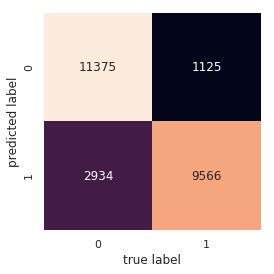

In [30]:
mat = confusion_matrix(pred_labels, test_labels)
plt.figure(figsize=(4, 4))
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.unique(test_labels),
            yticklabels=np.unique(test_labels))
plt.xlabel('true label')
plt.ylabel('predicted label')

In [31]:
print(classification_report(pred_labels,test_labels))

              precision    recall  f1-score   support

       False       0.91      0.79      0.85     14309
        True       0.77      0.89      0.82     10691

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000

